In [10]:
#Total precipitation amount including only precipitation values that are greater than the nth percentile of precip 
#on wet days (precip > 1mm)

#Open the file with the desired station

#-------------------------------------------------------------
#FINDING THE PERCENTILE (1981-2010)

#
#Loop through each year:

#    within the year find all of the lines of data that hold precipitation information
#    Variable in question :: PRCP
#    Create a new array filled with the lines of data including PRCP values
#    Loop through each line:

#    If the value is coded as missing (PRCP = 9999) skip this value
#    If the value is < 1mm skip this value
#    If the value is > 1mm add it to the new array called 'total' and move on to the next value

#  Move onto the next year continuously adding to the 'total' array

#  Order the array with all the values > 1mm in order from smallest to largest
#  Multiply the number of values in the array (n) by the percentile desired (.99)
#    New variable for the 99th percentile = RRwn
#  Find the 99th percentile value: total[99n] = 99p

#---------------------------------------------------------------
#Trend of precipitation events above the nth percentile:
#For any given year find the number of days where the precipitation amount is above the 99th percentile (1961-1990)

#Loop through the precipitation data and count days where it's greater than the desired percentile
#Plot the resulting graph for each station

#---------------------------------------------------------------
#Create a text file with the 95th, 98th, and 99th percentile days
#The text file also includes the annual accumulated precip from days above the percentile
#Also saves as a csv file


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import loadtxt
import csv

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/rphinney/anaconda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['percentile', 'trace']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [30]:
#Opening a GHCN-D file and reading variables
#Lincoln Station = USW00014939
#Asheville: USW00003812
# Omaha:'USW00014942'

station = 'USW00023065'     #Goodland
 
filename = '/Users/rphinney/Documents/Hollings/ghcnd_all/'+station+'.dly'
file = open(filename, 'r')

station_array = ['USW00023065', 'USW00014942','USW00003812','USW00014939']

 GRAND ISLAND AP              
<class 'str'>
 -98.3136 
560.8 
5274
5169
1.700784
1938
 LINCOLN MUNI AP              
<class 'str'>
 -96.7475 
362.7 
5646
5533
1.7204690000000002
1948
 HASTINGS MUNI AP             
<class 'str'>
 -98.4272 
591.3 
2150
2107
1.7086580000000002
1998
 OMAHA EPPLEY AIRFIELD        
<class 'str'>
 -95.8992 
299.3 
5944
5825
1.6889730000000003
1948
 ORD EVELYN SHARP FLD         
<class 'str'>
 -98.9517 
630.6 
1588
1556
1.4999970000000002
2000
 NORTH PLATTE RGNL AP         
<class 'str'>
-100.6694 
846.7 
5210
5106
1.271651
1948
 MCCOOK MUNI AP               
<class 'str'>
-100.5914 
771.1 
1950
1911
1.5196820000000002
1998
 SCOTTSBLUFF HEILIG AP        
<class 'str'>
-103.5931 
202.4 
5244
5139
1.0787380000000002
1893


FileNotFoundError: [Errno 2] No such file or directory: '/Users/rphinney/Documents/Hollings/ghcnd_all/.dly'

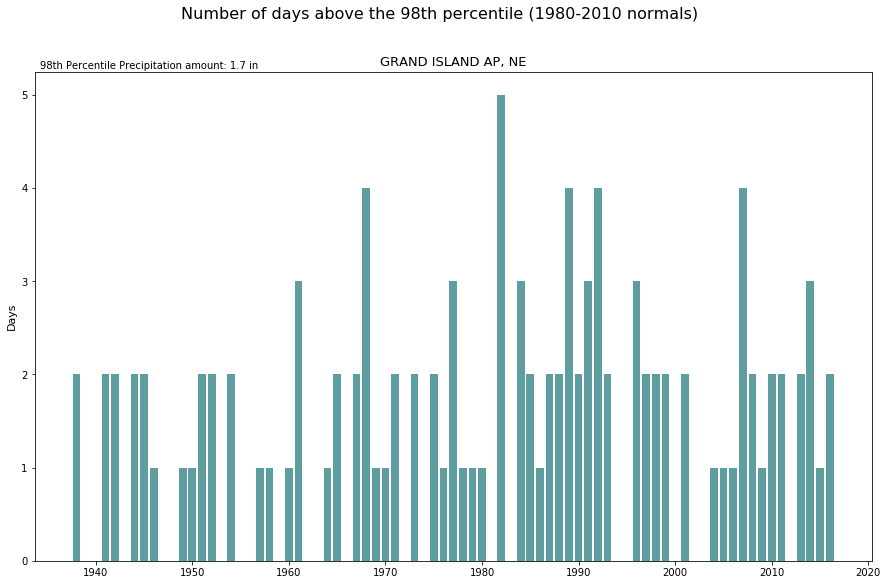

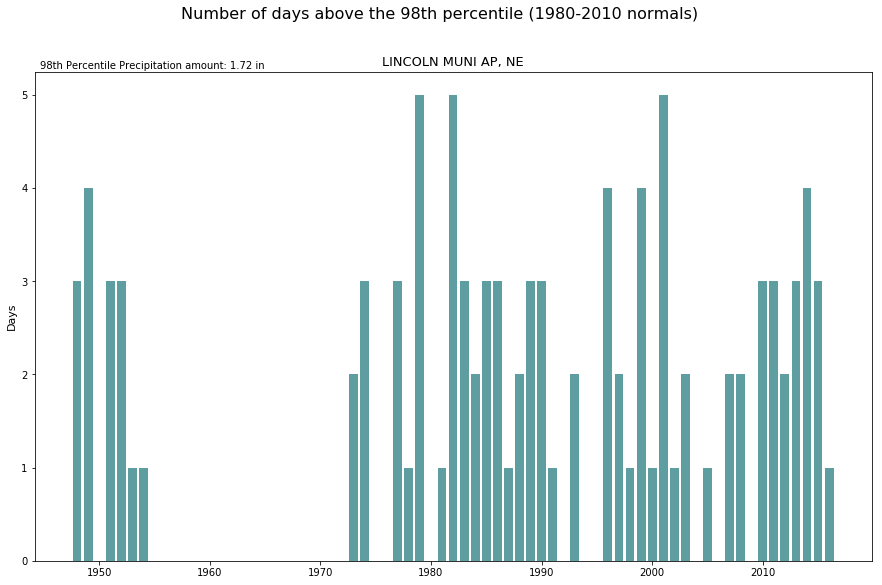

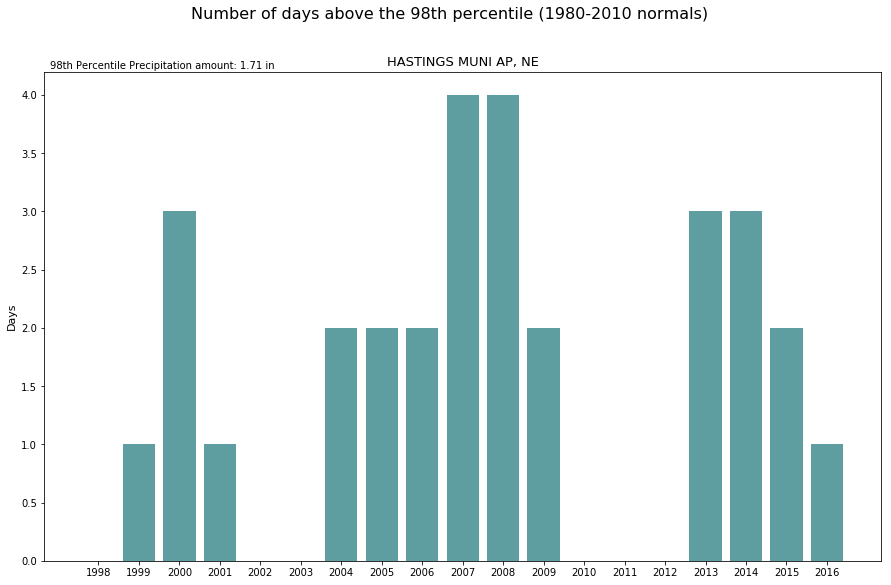

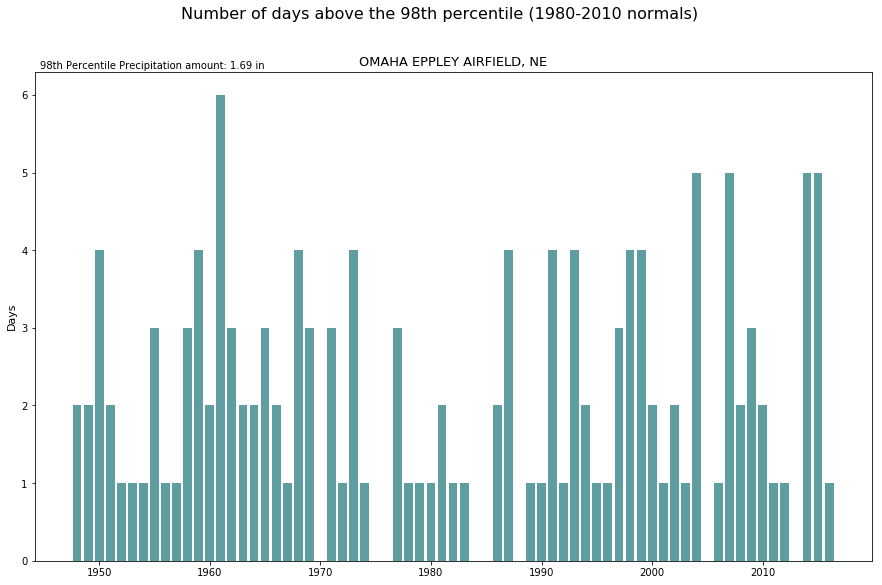

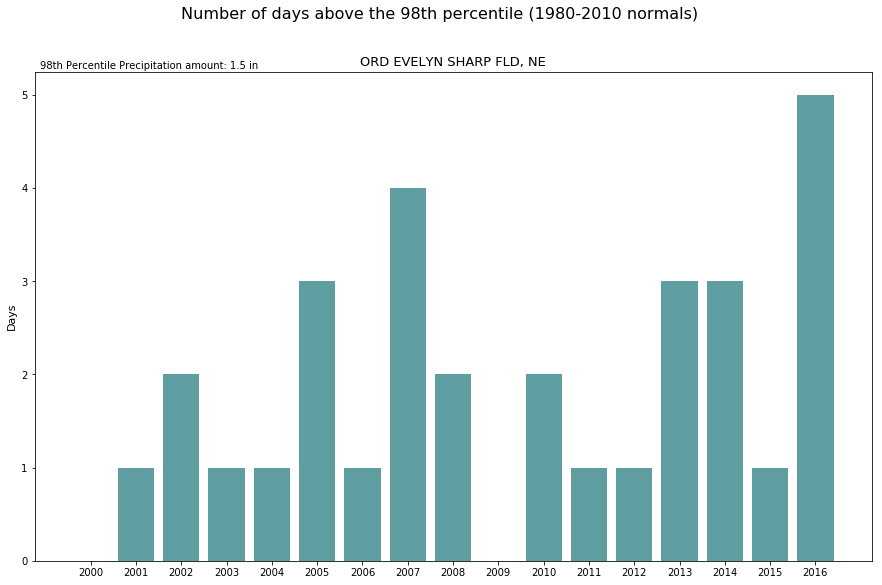

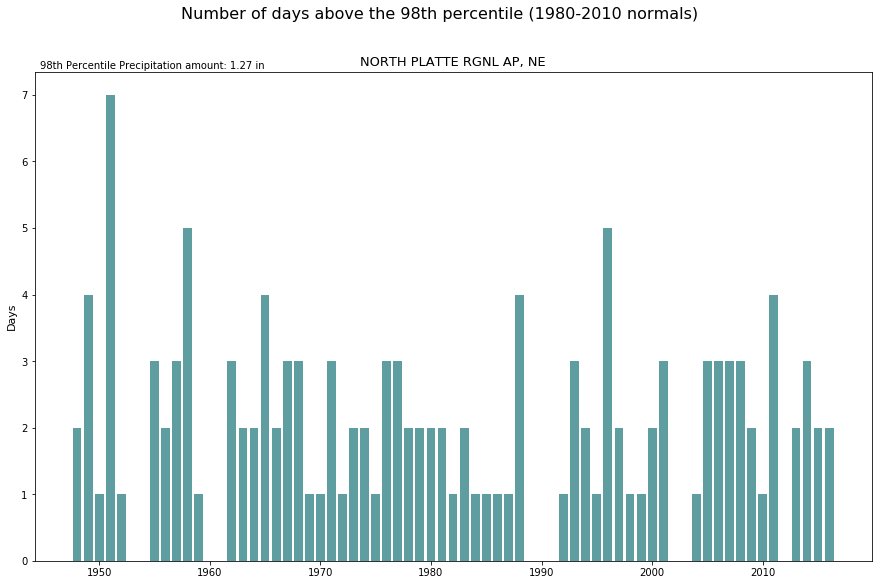

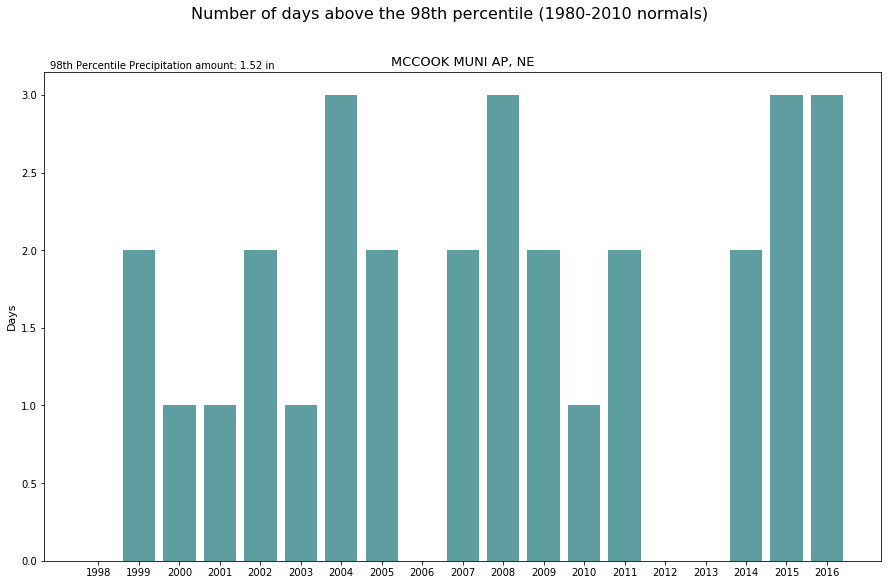

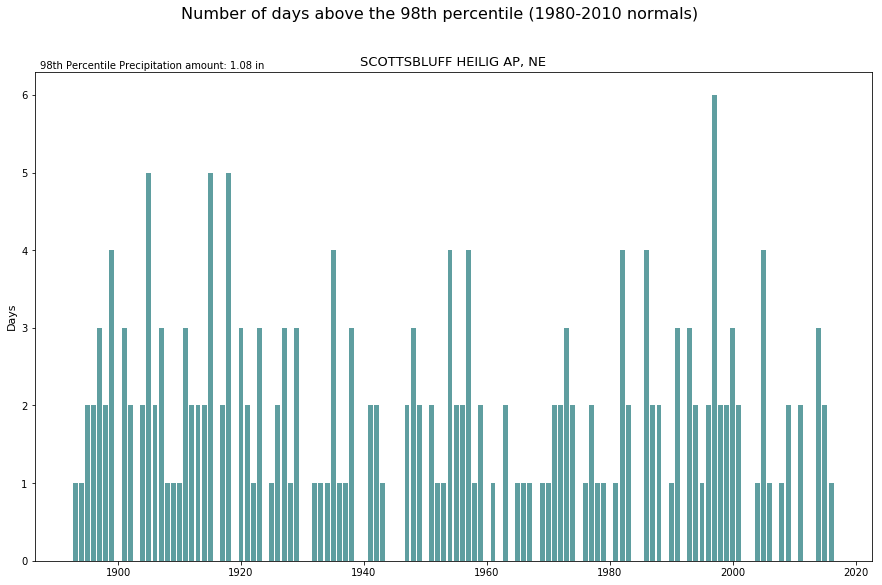

In [43]:
#Loop through all stations

midstations = open('/Users/rphinney/Documents/midstations.txt','r')
station_array = []



file_path = '/Users/rphinney/Documents/Hollings/yearcsv/'
with open(file_path+year+'.csv', 'w') as csvf:
    writerh =  csv.DictWriter(csvf, fieldnames = ['Year', 'Station ID','Latitude', 'Longitude', 'Elevation', 'Station Name','Year', 'Days above 95%', 'Annual Precip Accum (in)','Days above 98%', 'Annual Precip Accum 98% (in)','Days above 99%', 'Annual Precip Accum 99% (in)','Max One Day Precip','Max 5 Day Precip Accum','Max Consecutive Wet Days','Max Consecutive Dry Days' ])
    writerh.writeheader()
        


    for n in midstations:
        station_array.append(n)

    for station in station_array:
        station = station.strip()


        filename = '/Users/rphinney/Documents/Hollings/ghcnd_all/'+station+'.dly'
        file = open(filename, 'r')

        #Using ghcnd-stations.txt get the station information

        path = '/Users/rphinney/Documents/Hollings/ghcnd-stations.txt'

        station_file = open(path)
        ghcnd = []

        for x in station_file:
            ghcnd.append(x)

        for each_line in ghcnd:   
            if each_line[0:11] == station:
                station_name = each_line[40:70]
                station_state = each_line[38:40]
                latitude = each_line[13:20]
                longitude = each_line[21:31]
                elevation = each_line[32:38]
                station_name.strip()
                print(station_name)
                print(type(latitude))
                print(longitude)
                print(elevation)

        #---------------------------------------------------------------------------------------------------        
        #create an array (mylist) filled with each line of data
        #the format type of the array is string so the numbers will need to be converted to integers later on

        mylist = []

        for line in file:
            mylist.append(line)

        #define our range of years for normals
        begin_year = 1980
        end_year = 2010


        all_prcp = []
        for year in range(begin_year, end_year):
            year_prcp = []
            #all_prcp = []
            for line in mylist:
                if int(line[11:15]) == year:
                    if line[17:21] == 'PRCP':
                        year_prcp.append(line)

            for data in year_prcp:
                char1 = 22
                char2 = 26
                while char1 != 270:
                    if data[char1:char2] == '9999':
                        char1 = char1 + 8
                        char2 = char2 + 8
                    elif int(data[char1:char2]) < 1.:
                        char1 = char1 + 8
                        char2 = char2 + 8
                    else:
                        prcp = (.003937*int(data[char1:char2]))      #convert to inches
                        all_prcp.append(prcp)
                        char1 = char1 + 8
                        char2 = char2 + 8

        all_prcp.extend(all_prcp)  


        print(size(all_prcp))

        #----------------------------------------------------------------------------------------------------
        # sort the data from smallest value to largest
        all_prcp = sorted(all_prcp)

        # find the percentile location
        n_elements = size(all_prcp)

        #Variable can be changed depending on which percentile is being used
        percentile = .98
        loc = round(percentile*n_elements)
        print(loc)

        #find the precipitation value at the percentile location
        RRwn = (all_prcp[loc])
        print(RRwn)


        #-----------------------------------------------------------------------------------------------------
        #plots the number of days in which the precipitation amount was greater than the nth percentile for a given year
        #plots the annual amount of precipitation when the daily amount is greater than the nth percentile

        days = []
        annual = []

        #find the beginning year of the file

        for first in mylist:
            if first[17:21] == "PRCP":
                min_year = int(first[11:15])
                break

        print(min_year)
        max_year = 2017
        #day_max = 0
        day_maxa = []      #array of max precip for one day each year
        five_max = []
        max_dry = []
        max_wet = []
        for year in range(min_year,max_year):
            year_prcp = []
            for line in mylist:
                if int(line[11:15]) == year:
                    if line[17:21] == 'PRCP':
                        year_prcp.append(line)

            new_prcp = []
            trace = []
            for data in year_prcp:
                char1 = 22
                char2 = 26
                while char1 != 270:
                    if data[char1:char2] == '9999':
                        char1 = char1 + 8
                        char2 = char2 + 8
                    else:
                        prcp = (.003937*int(data[char1:char2])) 
                        new_prcp.append(prcp)
                        mflag = data[char2:char2+1]
                        trace.append(mflag)
                        char1 = char1 + 8
                        char2 = char2 + 8


            #Get the maximum one-day precip value------------------------------------------
            day_max = max(new_prcp, default = 0)
            if day_max == 0:
                day_max = 'N/A'
            day_maxa.append(day_max)    

            #Get the maximum five-day precip value-----------------------------------------
            begin = 0
            end = 5
            max5 = sum(new_prcp[begin:end])

            for x in new_prcp:
                begin = begin + 1
                end = end + 1
                b = sum(new_prcp[begin:end])
                max5 = max(b, max5)
            if max5 == 0:
                max5 = 'N/A'
            five_max.append(max5)            

            #Count the days above the percentile-------------------------------------------            
            day_count = 0  
            annprcp = 0
            for one in new_prcp:
                if one > RRwn:
                    day_count = 1 + day_count
                    annprcp = one + annprcp


            #Annual max consecutive wet days-----------------------------------------------
            count_wet = 0
            wet_days = 0
            num = 0

            for a in range(0,size(new_prcp)):
                value_w = new_prcp[a]
                #trace = trace[num]
                if value_w > 0.0:
                    count_wet = count_wet + 1
                if value_w == 0:
                    if trace[a] == 'T':
                        count_wet = count_wet + 1
                    else:
                        wet_days = max(count_wet, wet_days)
                        count_wet = 0
            if wet_days == 0:
                wet_days = 'N/A'

            max_wet.append(wet_days)  

            #Annal max consecutive dry days-------------------------------------------------
            count_dry = 0
            dry_days = 0

            for b in range(0,size(new_prcp)):
                value_d = new_prcp[b]
                if value_d == 0:
                    if trace[b] == 'T':
                        dry_days = max(count_dry, dry_days)
                        count_dry = 0
                    else:
                        count_dry = count_dry + 1
                if value_d > 0:
                    dry_days = max(count_dry, dry_days)
                    count_dry = 0           
            if dry_days == 0:
                dry_days = 'N/A'
            max_dry.append(dry_days)

            days.append(day_count)
            annual.append(annprcp)

            #print(year_prcp)


        #----------------------------------------------------------------------------------------------------
        #Plotting

        year = np.arange(min_year, 2017)
        plt.figure(figsize(15, 9))
        plt.bar(year, days, color = 'cadetblue')#, align = 'center')

        plt.suptitle ('Number of days above the ' + str(int(percentile*100))+ 'th percentile (1980-2010 normals)', size = 16)
        plt.title(station_name.strip()+ ', '+station_state, size = 13)
        plt.ylabel('Days', size = 11)
        if size(year) < 25:
            plt.xticks(year)
        plt.figtext(.13, .884, str(int(percentile*100))+'th Percentile Precipitation amount: '+ str(round(RRwn,2)) + ' in')

        savefig('/Users/rphinney/Documents/Hollings/test/'+station+'.png')

        year = np.arange(min_year, max_year)
        #plt.plot(year, annual)
        #plt.suptitle('Total Annual Precipitation Accumulation when Daily Precipitation is Above the ' +str(int(percentile*100))+'th Percentile', size = 15)
        #plt.ylabel('Precipitation (in)')
        #plt.title(station_name.strip()+', '+station_state, size = 12)

        #-----------------------------------------------------------------------------------------------------
        #Get the 95th percentile

        # find the percentile location
        n_elements = size(all_prcp)
        percentile = .95
        loc = round(percentile*n_elements)
        RRwn = (all_prcp[loc])
        days1 = []
        annual1 = []
        day_c1 = []
        ann1 = []

        #find the beginning year of the file
        for first in mylist:
            if first[17:21] == "PRCP":
                min_year = int(first[11:15])
                break
        max_year = 2017



        for year in range(min_year,max_year):
            year_prcp = []
            for line in mylist:
                if int(line[11:15]) == year:
                    if line[17:21] == 'PRCP':
                        year_prcp.append(line)

            new_prcp = []
            for data in year_prcp:
                char1 = 22
                char2 = 26
                while char1 != 270:
                    if data[char1:char2] == '9999':
                        char1 = char1 + 8
                        char2 = char2 + 8
                    else:
                        prcp = (.003937*int(data[char1:char2])) 
                        new_prcp.append(prcp)
                        char1 = char1 + 8
                        char2 = char2 + 8

            #array for the csv file (prints N/A for the precip values when there are no days above the percentile)           
            day_count = 0  
            annprcp = 0
            for one in new_prcp:
                if one > RRwn:
                    day_count = 1 + day_count
                    annprcp = one + annprcp
                    annprcp = round(annprcp,2)

            if annprcp == 0:
                annprcp = 'N/A'

            days1.append(day_count)
            annual1.append(annprcp)


            #array for the txt file
            day_c = 0
            prcp_c = 0
            for one in new_prcp:
                if one > RRwn:
                    day_c = 1 + day_c
                    prcp_c = one + prcp_c
                    prcp_c = round(prcp_c,2)   

            day_c1.append(day_c)
            ann1.append(prcp_c)



        #--------------------------------------------------------------------------------------------------
        #Get the 98th percentile

        # find the percentile location
        n_elements = size(all_prcp)
        percentile = .98
        loc = round(percentile*n_elements)
        RRwn = (all_prcp[loc])
        days2 = []
        annual2 = []
        day_c2 = []
        ann2 = []

        #find the beginning year of the file
        for first in mylist:
            if first[17:21] == "PRCP":
                min_year = int(first[11:15])
                break
        max_year = 2017


        for year in range(min_year,max_year):
            year_prcp = []
            for line in mylist:
                if int(line[11:15]) == year:
                    if line[17:21] == 'PRCP':
                        year_prcp.append(line)

            new_prcp = []
            for data in year_prcp:
                char1 = 22
                char2 = 26
                while char1 != 270:
                    if data[char1:char2] == '9999':
                        char1 = char1 + 8
                        char2 = char2 + 8
                    else:
                        prcp = (.003937*int(data[char1:char2])) 
                        new_prcp.append(prcp)
                        char1 = char1 + 8
                        char2 = char2 + 8

            #array for the csv file (prints N/A for the precip values when there are no days above the percentile)           
            day_count = 0  
            annprcp = 0
            for one in new_prcp:
                if one > RRwn:
                    day_count = 1 + day_count
                    annprcp = one + annprcp
                    annprcp = round(annprcp,2)

            if annprcp == 0:
                annprcp = 'N/A'

            days2.append(day_count)
            annual2.append(annprcp)


            #array for the txt file
            day_c = 0
            prcp_c = 0
            for one in new_prcp:
                if one > RRwn:
                    day_c = 1 + day_c
                    prcp_c = one + prcp_c
                    prcp_c = round(prcp_c,2)   

            day_c2.append(day_c)
            ann2.append(prcp_c)


        #---------------------------------------------------------------------------------------------------------
        #Find the 99th percentile

        # find the percentile location
        n_elements = size(all_prcp)
        percentile = .99
        loc = round(percentile*n_elements)
        RRwn = (all_prcp[loc])
        days3 = []
        annual3 = []
        day_c3 = []
        ann3 = []

        #find the beginning year of the file
        for first in mylist:
            if first[17:21] == "PRCP":
                min_year = int(first[11:15])
                break
        max_year = 2017



        for year in range(min_year,max_year):
            year_prcp = []
            for line in mylist:
                if int(line[11:15]) == year:
                    if line[17:21] == 'PRCP':
                        year_prcp.append(line)

            new_prcp = []
            for data in year_prcp:
                char1 = 22
                char2 = 26
                while char1 != 270:
                    if data[char1:char2] == '9999':
                        char1 = char1 + 8
                        char2 = char2 + 8
                    else:
                        prcp = (.003937*int(data[char1:char2])) 
                        new_prcp.append(prcp)
                        char1 = char1 + 8
                        char2 = char2 + 8


            #array for the csv file (prints N/A for the precip values when there are no days above the percentile)
            day_count = 0  
            annprcp = 0
            for one in new_prcp:
                if one > RRwn:
                    day_count = 1 + day_count
                    annprcp = one + annprcp
                    annprcp = round(annprcp,2)
            if annprcp == 0:
                annprcp = 'N/A'


            days3.append(day_count)
            annual3.append(annprcp)


            #array for the txt file 
            day_c = 0
            prcp_c = 0
            for one in new_prcp:
                if one > RRwn:
                    day_c = 1 + day_c
                    prcp_c = one + prcp_c
                    prcp_c = round(prcp_c,2)   

            day_c3.append(day_c)
            ann3.append(prcp_c)


        #-----------------------------------------------------------------------------------------------------
        year = np.arange(min_year,max_year)
        #export the data from the first graph into a text file

        path = '/Users/rphinney/Documents/Hollings/test/'
        file_id = open(path+station+'.txt', 'wb')


        data = np.array([year,day_c1,ann1,day_c2,ann2,day_c3,ann3])
        data = data.T

        np.savetxt(file_id, data, fmt = ['%d','%02i','%5.2f','%02i','%5.2f','%02i','%5.2f'])

        file_id.close()


        #plotting to csv file

        #create arrays for repeated variables:
        lat = []
        station_id = []
        lon = []
        ele = []
        stat_name = []
        for x in range(max_year-min_year):
            lat.append(latitude)
            lon.append(longitude)
            station_id.append(station)
            ele.append(elevation)
            stat_name.append(station_name)

        path = '/Users/rphinney/Documents/Hollings/testcsv/'
        file_id = open(path+station+'.csv', 'w')
        with open(path+station+'.csv', 'w') as csvfile:
            writerh = csv.DictWriter(csvfile, fieldnames = ['Station ID', 'Latitude', 'Longitude', 'Elevation', 'Station Name','Year', 'Days above 95%', 'Annual Precip Accum (in)','Days above 98%', 'Annual Precip Accum 98% (in)','Days above 99%', 'Annual Precip Accum 99% (in)','Max One Day Precip','Max 5 Day Precip Accum','Max Consecutive Wet Days','Max Consecutive Dry Days'])
            writerh.writeheader()

            writer = csv.writer(csvfile)
            writer.writerows(zip(station_id,lat,lon,ele,stat_name,year,days1,annual1,days2,annual2,days3,annual3,day_maxa,five_max,max_wet,max_dry))


        #csvfile.close()
        #Write to a csv file by year-----------------------------------------------------------------------------------
        yr = np.arange(min_year,max_year)


        for x in range(0,max_year-min_year):
            year = str(yr[x])
            row = [year, station_id[x], lat[x],lon[x],ele[x],stat_name[x],days1[x],annual1[x],days2[x],annual2[x],days3[x],annual3[x],day_maxa[x],five_max[x],max_wet[x],max_dry[x]]
            file_path = '/Users/rphinney/Documents/Hollings/yearcsv/'
            #with open(file_path+year+'.csv', 'w') as csvf:
                #writerh =  csv.DictWriter(csvf, fieldnames = ['Year', 'Station ID','Latitude', 'Longitude', 'Elevation', 'Station Name','Year', 'Days above 95%', 'Annual Precip Accum (in)','Days above 98%', 'Annual Precip Accum 98% (in)','Days above 99%', 'Annual Precip Accum 99% (in)','Max One Day Precip','Max 5 Day Precip Accum','Max Consecutive Wet Days','Max Consecutive Dry Days' ])
                #writerh.writeheader()
                #writer = csv.writer(csvf)
                #writer.writerows(zip(year, station_id[x], lat[x],lon[x],ele[x],stat_name[x],days1[x],annual1[x],days2[x],annual2[x],days3[x],annual3[x],day_maxa[x],five_max[x],max_wet[x],max_dry[x]))

            for each in row:
                writer = csv.writer(csvf)
                writer.writerow([each])

        
        
    
    

In [ ]:
year = year_prcp[8]
print(year)

In [ ]:
#print(year_prcp)